In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
# Rename functions
name_dict = {'cosine': 'Cosine similarity',
             'jaccard': 'Jaccard index',
             'masked_spearman': 'Masked Spearman',
             'pearson': 'Pearson correlation',
             'morans': 'Moran\'s R',
             'spearman': 'Spearman correlation',
             'product': 'Product',
             'norm_product': 'Normalized product',
             'stLearn': 'stLearn', # comment to remove stLearn from the plots
             }

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
dark2_palette = sns.color_palette('Dark2')
extended_palette = dark2_palette + [(1, 0, 0)]  # Add red color
cmap = ListedColormap(extended_palette)

def plot_regress_perf(results, metric_name, ax=None, show_x_labels=True, show_legend=False, 
                      title_fontsize=16, label_fontsize=14, tick_labelsize=12):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(x='patient_group', y=metric_name, hue='function_name', data=results, palette=extended_palette, ax=ax, 
                flierprops=dict(marker='d', markersize=2)
                )
    
    # # Ensure that the dodge parameter is set to True and the hue order matches the boxplot
    # sns.stripplot(x='patient_group', y=metric_name, hue='function_name', data=results, 
    #               color='black', size=2, ax=ax, dodge=True)
    
    ax.set_title('', fontsize=title_fontsize)
    ax.set_xlabel('Condition' if show_x_labels else '', fontsize=label_fontsize)
    ax.set_ylabel(str.upper(metric_name), fontsize=label_fontsize)
    
    if show_legend:
        ax.legend(title='Metric', fontsize=label_fontsize)
    else:
        ax.legend([],[], frameon=False)
    
    if not show_x_labels:
        ax.set_xticklabels([])
    else:
        ax.tick_params(axis='x', labelrotation=90, labelsize=tick_labelsize)
        ax.tick_params(axis='y', labelsize=tick_labelsize)
    
    # This is necessary to remove the extra legend created by stripplot due to the 'hue' parameter
    handles, labels = ax.get_legend_handles_labels()
    if show_legend:
        ax.legend(handles[:len(set(results['function_name']))], labels[:len(set(results['function_name']))], 
                  title='Metric', fontsize=label_fontsize)
    else:
        ax.legend([],[], frameon=False)
    
    return ax


def plot_annot_perf(performance, y, metric_name, ax=None, show_legend=False, show_x_labels=False,
                    title_fontsize=16, label_fontsize=14, tick_labelsize=12, legend_fontsize=12):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(x='function_name', y=y, data=performance, palette=extended_palette, ax=ax,
                flierprops=dict(marker='d', markersize=2)
                )
    
    ax.set_title('', fontsize=title_fontsize)
    ax.set_xlabel('', fontsize=label_fontsize)
    ax.set_ylabel(metric_name, fontsize=label_fontsize)
    ax.tick_params(axis='x', labelrotation=90, labelsize=tick_labelsize)
    ax.tick_params(axis='y', labelsize=tick_labelsize)
    ax.set_ylim(0.5, 1)

        
    if not show_x_labels:
        ax.set_xticklabels([])
    else:
        ax.tick_params(axis='x', labelrotation=90, labelsize=tick_labelsize)
        ax.tick_params(axis='y', labelsize=tick_labelsize)

    if show_legend:
        ax.legend(title='Metric', fontsize=legend_fontsize)
    else:
        ax.legend([], [], frameon=False)

    return ax


## Regression Results

In [4]:
regress = pd.read_csv("regression_results.csv")
metadata = pd.read_csv("visium_meta.csv")

In [5]:
# mean r2 and rmse, aggregate folds
regress = regress.groupby(['dataset_name', 'function_name']).mean().reset_index()

In [6]:
regress = regress.merge(metadata, left_on='dataset_name', right_on='slide_name', how='left')

In [7]:
# how many datasets per major_labl
regress.groupby('patient_group').count() / 8

,dataset_name,function_name,r2,rmse,slide_name,patient,patient_region_id,major_labl,batch,hca_sample_id
patient_group,,,,,,,,,,
group_1,15.750,15.750,15.750,15.750,15.750,15.750,15.750,15.750,15.750,15.750
group_2,10.125,10.125,10.125,10.125,10.125,10.125,10.125,10.125,10.125,10.125
group_3,5.625,5.625,5.625,5.625,5.625,5.625,5.625,5.625,5.625,5.625


In [8]:
## patient_group, group_1 to myogenic, 2 to ischemic, 3 to fibrotic
regress['patient_group'] = regress['patient_group'].replace({'group_1': 'Myogenic\n(n=14)', 'group_2': 'Ischemic\n(n=9)', 'group_3': 'Fibrotic\n(n=5)'})

In [9]:
regress['function_name'].replace(name_dict, inplace=True)
regress['function_name'] = pd.Categorical(regress['function_name'], categories=name_dict.values())

In [10]:
regress.groupby(['function_name', 'patient_group']).mean().sort_index().round(3)

/tmp/ipykernel_3986682/495668558.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regress.groupby(['function_name', 'patient_group']).mean().sort_index().round(3)


r2   rmse
function_name        patient_group                 
Cosine similarity    Fibrotic\n(n=5)   0.273  0.072
                     Ischemic\n(n=9)   0.323  0.062
                     Myogenic\n(n=14)  0.109  0.066
Jaccard index        Fibrotic\n(n=5)   0.277  0.071
                     Ischemic\n(n=9)   0.325  0.062
                     Myogenic\n(n=14)  0.110  0.066
Masked Spearman      Fibrotic\n(n=5)   0.233  0.076
                     Ischemic\n(n=9)   0.279  0.066
                     Myogenic\n(n=14)  0.087  0.067
Pearson correlation  Fibrotic\n(n=5)   0.250  0.074
                     Ischemic\n(n=9)   0.287  0.065
                     Myogenic\n(n=14)  0.097  0.067
Moran's R            Fibrotic\n(n=5)   0.232  0.072
                     Ischemic\n(n=9)   0.305  0.062
                     Myogenic\n(n=14)  0.137  0.062
Spearman correlation Fibrotic\n(n=5)   0.238  0.076
                     Ischemic\n(n=9)   0.276  0.066
                     Myogenic\n(n=14)  0.096  0.067
Product              Fibrotic\n(n=5)   0.291  0.070
                     Ischemic\n(n=9)   0.341  0.061
                     Myogenic\n(n=14)  0.121  0.065
Normalized product   Fibrotic\n(n=5)   0.290  0.070
                     Ischemic\n(n=9)   0.341  0.061
                     Myogenic\n(n=14)  0.121  0.065
stLearn              Fibrotic\n(n=5)   0.241  0.072
                     Ischemic\n(n=9)   0.333  0.058
                     Myogenic\n(n=14)  0.184  0.058

In [11]:
regress.to_csv(os.path.join("..", "..", "figures", "source", "ExtData_Fig2C-D.csv"))

## Annotation results

In [12]:
anno = pd.read_csv("annotation_results.csv")

In [13]:
anno.groupby('function_name').mean()

/tmp/ipykernel_3986682/2276313353.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anno.groupby('function_name').mean()


,Unnamed: 1,roc_auc,f1,oob_score
function_name,,,,
cosine,43.5,0.952130,0.886463,0.905342
jaccard,44.5,0.952814,0.891062,0.906295
masked_spearman,48.5,0.918150,0.859423,0.878107
morans,47.5,0.897103,0.841240,0.858094
norm_product,46.5,0.944936,0.894231,0.908639
pearson,41.5,0.949153,0.876831,0.899461
product,45.5,0.944967,0.894486,0.908621
spearman,42.5,0.938063,0.873741,0.895958
stLearn,40.5,0.897629,0.841683,0.855516


/tmp/ipykernel_3986682/485928993.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anno = anno.groupby(['dataset_name', 'function_name']).mean().reset_index()
/tmp/ipykernel_3986682/1201335738.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='function_name', y=y, data=performance, palette=extended_palette, ax=ax,
/tmp/ipykernel_3986682/1201335738.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='function_name', y=y, data=performance, palette=extended_palette, ax=ax,


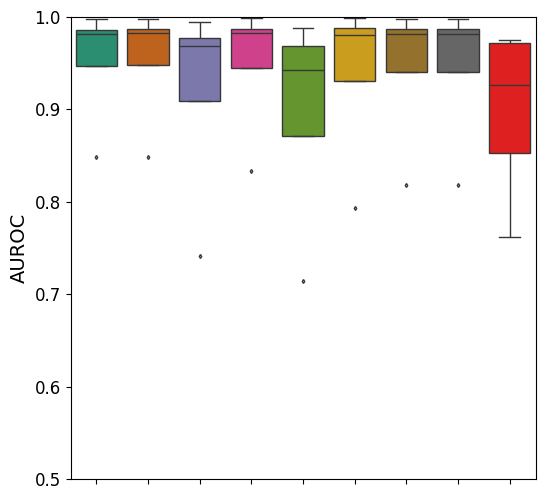

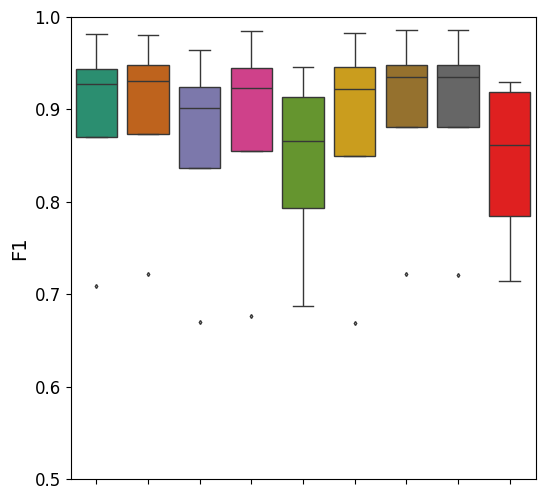

In [14]:
anno = anno.groupby(['dataset_name', 'function_name']).mean().reset_index()
# rank by dataset_name
anno['rank'] = anno.groupby('dataset_name')['roc_auc'].rank(ascending=False).astype('int')

anno['function_name'].replace(name_dict, inplace=True)
anno['function_name'] = pd.Categorical(anno['function_name'], categories=name_dict.values())
plot = plot_annot_perf(anno, y='roc_auc', metric_name='AUROC')
plot = plot_annot_perf(anno, y='f1', metric_name='F1')

In [15]:
anno.to_csv(os.path.join("..", "..", "figures", "source", "ExtData_Fig2A&B.csv"))

## Concat plots and Save

In [16]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

/tmp/ipykernel_3986682/1201335738.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='function_name', y=y, data=performance, palette=extended_palette, ax=ax,
/tmp/ipykernel_3986682/1201335738.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='function_name', y=y, data=performance, palette=extended_palette, ax=ax,


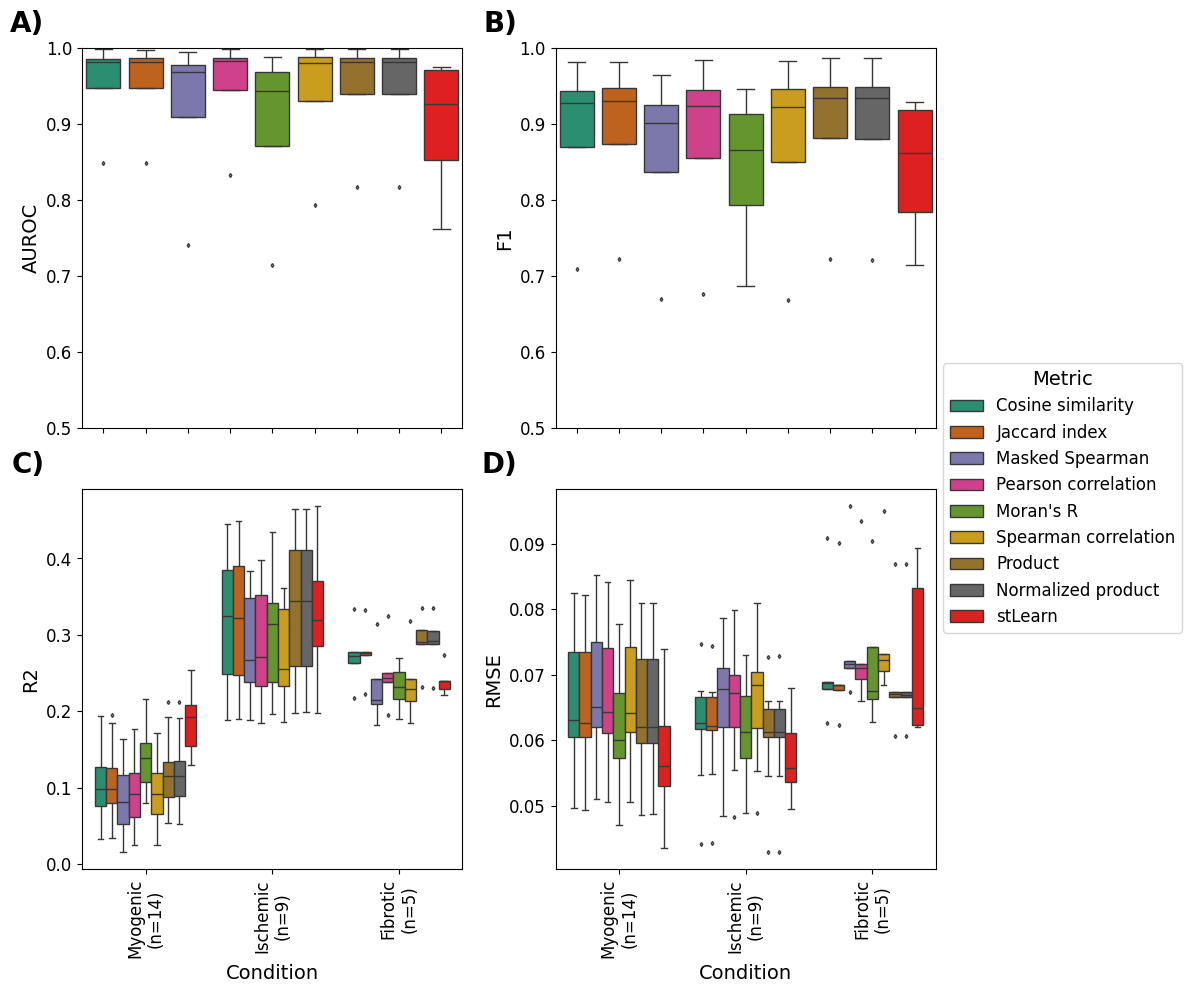

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plot_annot_perf(anno, 'roc_auc', metric_name="AUROC", ax=axes[0, 0], show_x_labels=False)
plot_annot_perf(anno, 'f1', metric_name='F1', ax=axes[0, 1], show_x_labels=False)
plot_regress_perf(regress, 'r2', ax=axes[1, 0], show_x_labels=True)
plot_regress_perf(regress, 'rmse', ax=axes[1, 1], show_x_labels=True)

# Rotate the x-axis labels for the bottom left plot
for label in axes[1, 0].get_xticklabels():
    label.set_rotation(90)

# add A), B), C), D) to each plot
labs = ['A)', 'B)', 'C)', 'D)']
for ax in axes.flatten():
    ax.text(-0.1, 1.1, labs.pop(0), transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Move the legend to the right side of the figure
handles, labels = axes[1, 1].get_legend_handles_labels()
handles = [h for h in handles if isinstance(h, mpatches.Rectangle)]
# keep only labels for the number of handl
labels = labels[:len(handles)]
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1, 0.5), title='Metric', fontsize=12, title_fontsize=14)

plt.tight_layout(rect=[0, 0, 0.80, 1])  # Adjust the rect to prevent cutting off the x-axis labels and make space for the legend
plt.savefig(os.path.join("..", "..", "figures", "ExtData_Fig2.pdf"), dpi=300)
plt.show()


Rebuttal Figure 4

In [18]:
efficiency = pd.read_csv("efficiency.csv")
### boxplot by time
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
efficiency

,dataset_name,function_name,time
0,1160920F,stLearn,2734.910611
1,1160920F,pearson,92.843769
2,1160920F,spearman,261.331063
3,1160920F,cosine,24.740382
4,1160920F,jaccard,24.487005
5,1160920F,product,23.764919
6,1160920F,norm_product,22.173368
7,1160920F,morans,31.994146
8,1160920F,masked_spearman,1586.577487
9,CID44971,stLearn,630.115759


In [20]:
efficiency['function_name'].replace(name_dict, inplace=True)
# re-order the function_name
efficiency['function_name'] = pd.Categorical(efficiency['function_name'], categories=name_dict.values(), ordered=True)

/tmp/ipykernel_3986682/3863886178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="function_name", y="time", data=efficiency, palette=extended_palette)


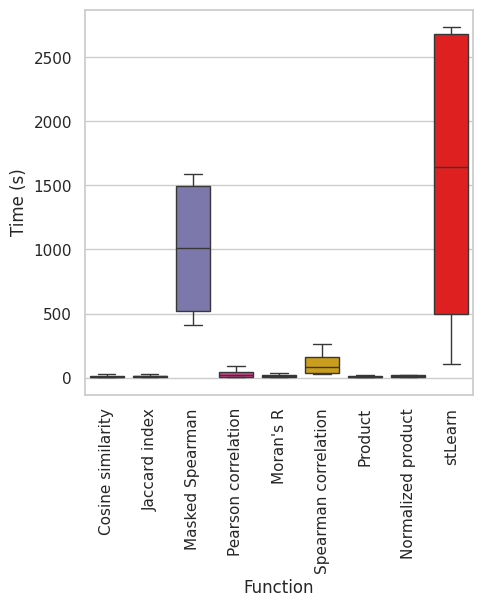

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x="function_name", y="time", data=efficiency, palette=extended_palette)
plt.xticks(rotation=90)
# axis labels
plt.xlabel('Function')
plt.ylabel('Time (s)')
plt.show()